![กระทรวงแรงงาน](https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/logo_laber.jpg "กระทรวงแรงงาน")

https://ldls.mol.go.th/main

# Import module
import `re`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; = ใช้ในการ search หา str ใน text
<br>
import `numpy`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; = ใช้ในการจัดรูปแบบกราฟวิเคราะห์ข้อมูล
<br>
import `pandas`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; = ใช้ในการจัดการข้อมูลที่เป็น dataframe
<br>
import `seaborn`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;= ใช้ในการทำรูปแบบกราฟต่าง ๆ ของข้อมูล
<br>
import `matplotlib.pyplot`&emsp;&emsp;&emsp; = ใช้ในการคำนวณและ plot กราฟ 

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file
อ่านไฟล์ CSV ทั้งหมด 5 ไฟล์ ประกอบด้วยข้อมูลสาขาวิชาของป.ตรี ปี 2563, 2564, 2565, 2566 และข้อมูลที่รวมทั้ง 4 ปีเข้าด้วยกัน

In [2]:

data_all = pd.read_csv(f"https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/all.csv")
data_2563 = pd.read_csv("https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/2563.csv")
data_2564 = pd.read_csv("https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/2564.csv")
data_2565 = pd.read_csv("https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/2565.csv")
data_2566 = pd.read_csv("https://raw.githubusercontent.com/Comrade26/Interesting_data_project/main/team7_assgn1/2566.csv")

# List data importantly
การ clean data ขั้นที่ 1
1. เปลี่ยนชื่อคอลัมน์จากภาษาไทยเป็นภาษาอังกฤษ ทำเพื่อให้เวลา plot กราฟ ไม่ต้องมีการกำหนด font
2. ลบตัวอักษรบางตัวที่อาจก่อให้เกิด Erro code เช่น "-" 

In [3]:
list_data = [data_2563, data_2564, data_2565, data_2566, data_all]

dict_for_change = {"สาขาวิชา": "Major",	"ชาย": "Male", "หญิง": "Female", "ไม่ระบุเพศ" : "Unknow_Gender", "แรงงานไทย": "Thai", "แรงงานต่างด้าว": "Non_Thai", "แรงงานที่ต้องการรวม": "Total_Work_Demand"}

letter_box = ["-", "(", ")", "[", "]"]
for c in list_data:
    for n in range(len(dict_for_change)):
        c.columns = c.columns.str.replace(list(dict_for_change.keys())[n],list(dict_for_change.values())[n]) 
    for i in range(len(c.Major)):
        for letter in letter_box:
            c.loc[i, "Major"] = c.loc[i, "Major"].replace(letter, " ")



# Clean Data
การ clean data ขั้นที่ 2
<br>
การ clean data ขั้นนี้ทำเพื่อลบข้อมูลที่อาจจะผิดออกจาก data ของข้อมูลเดิม

In [4]:
all_name = []
not_want_word = ["ปวส", "ปวช", "ป.โท", "ช่าง", "สำนักงานใหญ๋", "วิชาชีพ", "ผู้ควบคุม", "ทั่วไป", "อาชีว", "ก่อสร้าง", "เชื่อมโลหะ", "เทคนิค", "แม่พิมพ์โลหะ", "ที่เกี่ยวข้อง", "ฝ่ายผลิต", "การผลิต", "ความปลอดภัย", "ช่่างยนต์", "สำนักงานใหญ่"]
for c in list_data:
    for i in range(len(c)):
        match_not_wanted = re.search("|".join(not_want_word), c.Major[i])
        if match_not_wanted is not None:
            c.Major = c.Major.drop(i)
        else:
            all_name.append(c.Major[i])

clean_data_2563 = data_2563.dropna().reset_index(drop= True)
clean_data_2564 = data_2564.dropna().reset_index(drop= True)
clean_data_2565 = data_2565.dropna().reset_index(drop= True)
clean_data_2566 = data_2566.dropna().reset_index(drop= True)
clean_data_all = data_all.dropna().reset_index(drop= True)

clean_list_data = [clean_data_2563, clean_data_2564, clean_data_2565, clean_data_2566, clean_data_all]

# Category of data
การแยกประเภท data เพื่อใช้ในการ clean data ในลำดับถัดไป

In [5]:
need_all = ["ทุกสาขา", "ไม่จำกัด", "ไม่กำหนด", "ไม่เน้น", "ปริญญาตรี", "สาขาใดก็ได้"]
บริหาร = ["yp=u","Finance" , "บันชี", "ตลาด", "การเงิน", "บัญชี", "บริหาร", "โลจิสติกส์", "การขาย", "ทรัพยากรมนุษย์", "เศรษฐศาสตร์", "การจัดการ", "logistic", "business", "accounting", "commerce", "พาณิช", "งานบุคคล", "การบันชี", "ธุรการ",]
วิศวกรรม = ["วิศว", "engineer", "ไฟฟ้า", "เครื่องกล", "อุตสาหกรรม", "electrical", "อีเล็กทรอนิค", "อิเล็กทรอนิกส์","อิเล็กทรอนิค","อีเล็คทรอนิก", "ยานยนต์", "วิสว", "ไฟฟา", "อุตสาหการ", "โยธา", "rubber", "เครื่องจักร"]
วิทยาศาสตร์ = ["โพลิเมอร์", "วิทยาศาสตร์", "เทคโนโลยีอาหาร", "สาธาณะสุข", "วิทยาศาสรต์", "อาหารและโภชนาการ", "สังคมสิ่งแวดล้อม", "เกษตร", "เกษคร", "ประมง", "คณิตศาสตร์", "การประกันภัย", "เทคโนโลยีการบรรจุ", "data science", "เกษตรกรรม", "คหกรรมศาสตร์"]
เทคโนโลยีสารสนเทศ = ["computer", "it", "คอมพิวเตอร์", "สาร์นสนเทศน์", "programmer", "คอมฟิวเตอร์", "เทคโนโลยีสารสนเทศ"]
แพทย์ศาสตร์ = ["เฉพาะทางด้านไตเทียม", "เภสัช", "แพทย์", "พยาบาล", "การดูแลเด็กและผู้สูงอายุ", "สัตวแพทย์", "สัตวแพทย", "รังสีเทคนิค", "ทันตแพทย", "กายภาพบำบัด", "สาธารณสุข", "สัตวศาสตร์"]
ครุศาสตร์ = ["มัธยมศึกษา", "ประถมศึกษา", "พัฒนาหลักสูตร", "ครุศาสตร์", "การสอน", "การศึกษา", "วิจัย", "การศึกษานอกระบบ", "เลขานุการ", "สื่อสารการศึกษา", "ศึกษาศาสตร์", "ปฐมวัย"]
ศิลปศาสตร์ = ["ศิลปกรรม", "กราฟฟิกส์ดีไซด์", "ออกแบบ", "ศิลป", "กราฟฟิคดีไซน์", "design"]
สถาปัตยกรรมศาสตร์ = ["สถาปัต", "เขียนแบบ"]
อักษรศาสตร์ = ["ญี่ปุ่น", "ภาษาอังกฤษ", "การสื่อสาร", "ภาษาต่างประเทศ", "อักษรศาสตร์"]
มนุษยศาสตร์ = ["มนุษยศาสตร์", "มานุษยวิทยา", "มานุษยสงเคราะห์"]
นิติศาสตร์ = ["นิติ", "เลขานุการ", "กฎหมาย", "รัฐศาสตร์", "laws"]
คณะนิเทศศาสตร์ = ["ประชาสัมพันธ์", "นิเทศ", "สื่อสารมวลชน"]
ดุริยางคศาสตร์ = ["ดุริยาง", "ดนตรี"]
การบริการและการท่องเที่ยว = ["การโรงแรม", "การบริการ", "สาขาท่องเที่ยว"]

# Group and Change lang Data
การ clean data ขั้นที่ 3 เป็นการเปลี่ยนข้อมูลใน dataframe ให้แยกตามหมวดหมู่ตามที่เราเคยแยกหมวดหมู่ไว้ก่อนหน้านี้

In [6]:
need_attention = []

for k in clean_list_data:
    for num in range(len(k.Major)):
        match_need_all = re.search("|".join(need_all), k.Major[num].lower())
        match_บริหาร = re.search("|".join(บริหาร), k.Major[num].lower())
        match_วิศวกรรม = re.search("|".join(วิศวกรรม), k.Major[num].lower())
        match_วิทยาศาสตร์ = re.search("|".join(วิทยาศาสตร์), k.Major[num].lower())
        match_เทคโนโลยีสารสนเทศ = re.search("|".join(เทคโนโลยีสารสนเทศ), k.Major[num].lower())
        match_แพทย์ศาสตร์ = re.search("|".join(แพทย์ศาสตร์), k.Major[num].lower())
        match_ครุศาสตร์ = re.search("|".join(ครุศาสตร์), k.Major[num].lower())
        match_ศิลปศาสตร์ = re.search("|".join(ศิลปศาสตร์), k.Major[num].lower())
        match_สถาปัตยกรรมศาสตร์ = re.search("|".join(สถาปัตยกรรมศาสตร์), k.Major[num].lower())
        match_อักษรศาสตร์ = re.search("|".join(อักษรศาสตร์), k.Major[num].lower())
        match_มนุษยศาสตร์ = re.search("|".join(มนุษยศาสตร์), k.Major[num].lower())
        match_นิติศาสตร์ = re.search("|".join(นิติศาสตร์), k.Major[num].lower())
        match_คณะนิเทศศาสตร์ = re.search("|".join(คณะนิเทศศาสตร์), k.Major[num].lower())
        match_ดุริยางคศาสตร์ = re.search("|".join(ดุริยางคศาสตร์), k.Major[num].lower())
        match_การบริการและการท่องเที่ยว = re.search("|".join(การบริการและการท่องเที่ยว), k.Major[num].lower())
        if match_need_all is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Any Major'
        elif match_บริหาร is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Management'
        elif match_วิทยาศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Science'
        elif match_วิศวกรรม is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Engineering'
        elif match_เทคโนโลยีสารสนเทศ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Computer'
        elif match_แพทย์ศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Medicine'
        elif match_ครุศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Education'
        elif match_ศิลปศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Art'
        elif match_สถาปัตยกรรมศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Architecture'
        elif match_อักษรศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Literature'
        elif match_มนุษยศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Humanities'
        elif match_นิติศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Law'
        elif match_คณะนิเทศศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Communication Arts'
        elif match_ดุริยางคศาสตร์ is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Music'
        elif match_การบริการและการท่องเที่ยว is not None:
            k.loc[k['Major'].str.contains(k.Major[num]), 'Major'] = 'Tourism and Hospitality'
        else: need_attention.append(k.Major[num])

# Aggregate the data
การจัดรูปแบบ dataframe ให้ group by โดย Major

In [7]:
aggregation_functions = {'Male': 'sum', 'Female': 'sum', 'Unknow_Gender': 'sum', 'Thai': 'sum', 'Non_Thai': 'sum', 'Total_Work_Demand': 'sum'}
new_data_2563 = clean_data_2563.groupby(clean_data_2563.Major).aggregate(aggregation_functions)
new_data_2564 = clean_data_2564.groupby(clean_data_2564.Major).aggregate(aggregation_functions)
new_data_2565 = clean_data_2565.groupby(clean_data_2565.Major).aggregate(aggregation_functions)
new_data_2566 = clean_data_2566.groupby(clean_data_2566.Major).aggregate(aggregation_functions)
new_data_all = clean_data_all.groupby(clean_data_all.Major).aggregate(aggregation_functions)

new_data_2563.sort_values("Thai", inplace=True, ascending=False)
new_data_2563.reset_index(inplace=True)

new_data_2564.sort_values("Thai", inplace=True, ascending=False)
new_data_2564.reset_index(inplace=True)

new_data_2565.sort_values("Thai", inplace=True, ascending=False)
new_data_2565.reset_index(inplace=True)

new_data_2566.sort_values("Thai", inplace=True, ascending=False)
new_data_2566.reset_index(inplace=True)

new_data_all.sort_values("Thai", inplace=True, ascending=False)
new_data_all.reset_index(inplace=True)

new_list_data = [new_data_2563, new_data_2564, new_data_2565, new_data_2565, new_data_2566, new_data_all]

# Sort data
การทำ timestamp เพื่อให้ข้อมูลมารวมกันและสามารถระบุได้ว่าข้อมูลนี้เป็นของปีอะไร

In [8]:
year_only_list = [clean_data_2563, clean_data_2564, clean_data_2565]
start_year = 2563

for i, c in enumerate(year_only_list):
    c.insert(0, "Year", str(start_year + i),True)

year_with_timestamp = pd.concat(year_only_list, axis=0)

year_with_timestamp.reset_index(inplace= True, drop=True)

# Line graph
กราฟที่แสดงให้เห็นถึง demand ในการจ้างงานของวิชาสาขาต่อปี

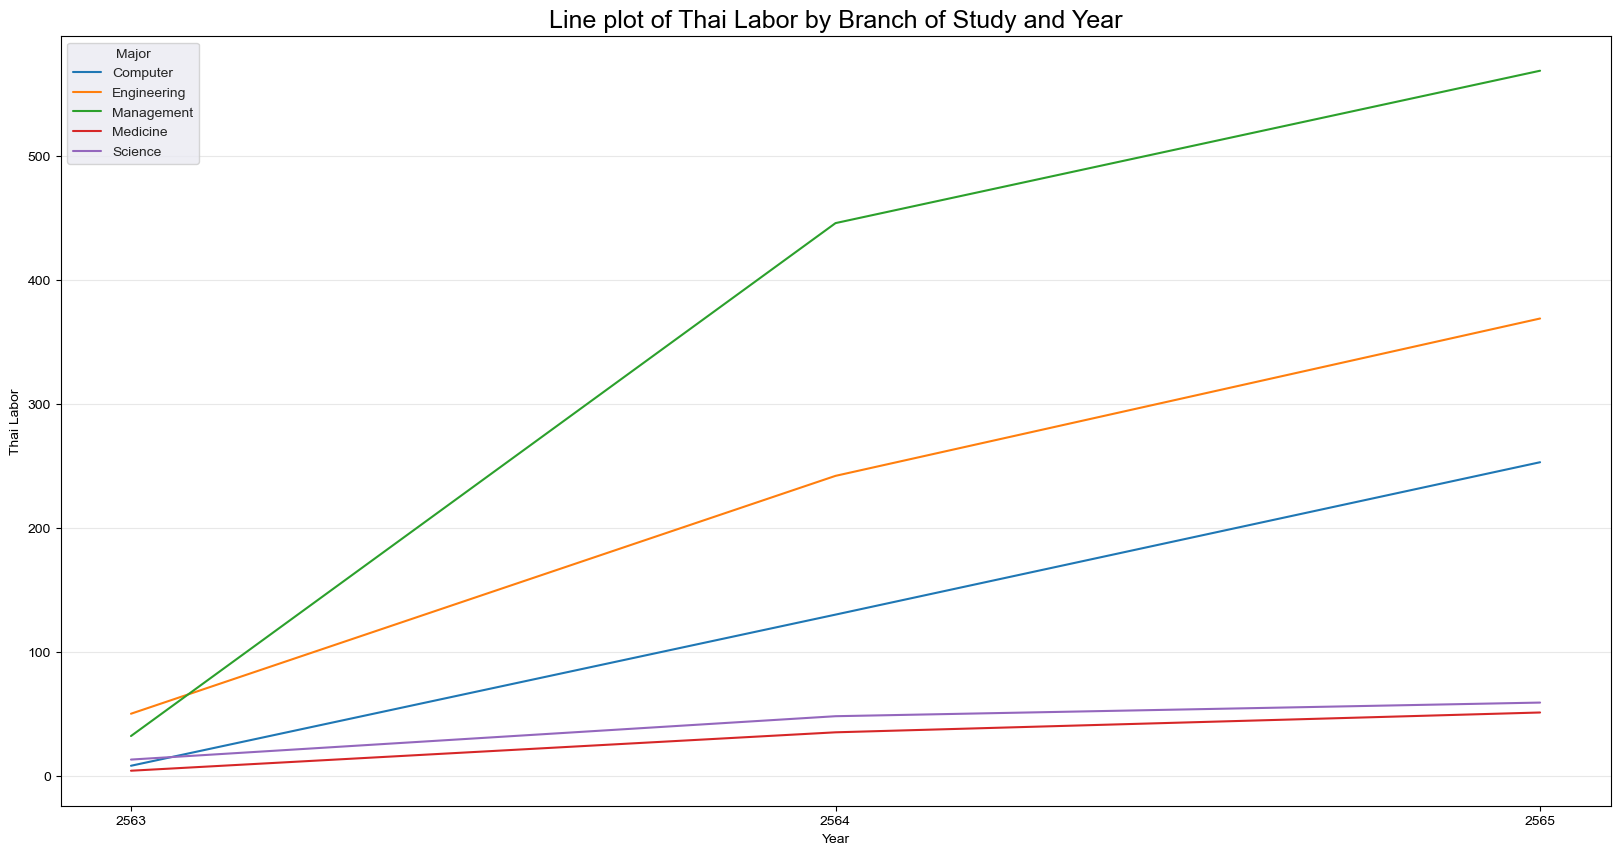

In [9]:
year_major_group = year_with_timestamp.groupby(['Year', 'Major'])['Thai'].sum().reset_index()

top_5_majors = year_major_group['Major'].value_counts().head(6).index.tolist()
top_5_data = year_major_group[(year_major_group['Major'].isin(top_5_majors)) & (year_major_group['Major'] != 'Any Major')]

plt.figure(figsize=(20, 10))
plt.title('Line plot of Thai Labor by Branch of Study and Year', fontsize = 18)

sns.set_style("darkgrid")
sns.lineplot(x ='Year', y ='Thai', hue = 'Major', data = top_5_data)
plt.xticks(year_with_timestamp['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Thai Labor')

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

plt.show()


# Growth
แสดงการเปลี่ยนแปลงของ demand ตั้งแต่ปี 2563-2565 (จำนวนเท่า)

In [10]:
year_major_group = year_with_timestamp.groupby(['Year', 'Major'])['Thai'].sum().reset_index()

year_major_group['percent_increase'] = round(year_major_group.groupby('Major')['Thai'].pct_change(), 1)

average_increase = year_major_group.groupby('Major')['percent_increase'].mean()

average_increase.sort_values(ascending= False).head(6)


Major
Computer        8.05
Architecture    7.00
Management      6.60
Any Major       4.20
Medicine        4.15
Engineering     2.15
Name: percent_increase, dtype: float64

# Bar Chart 1
10 อันดับ demand ที่ต้องการในแรงงานไทย

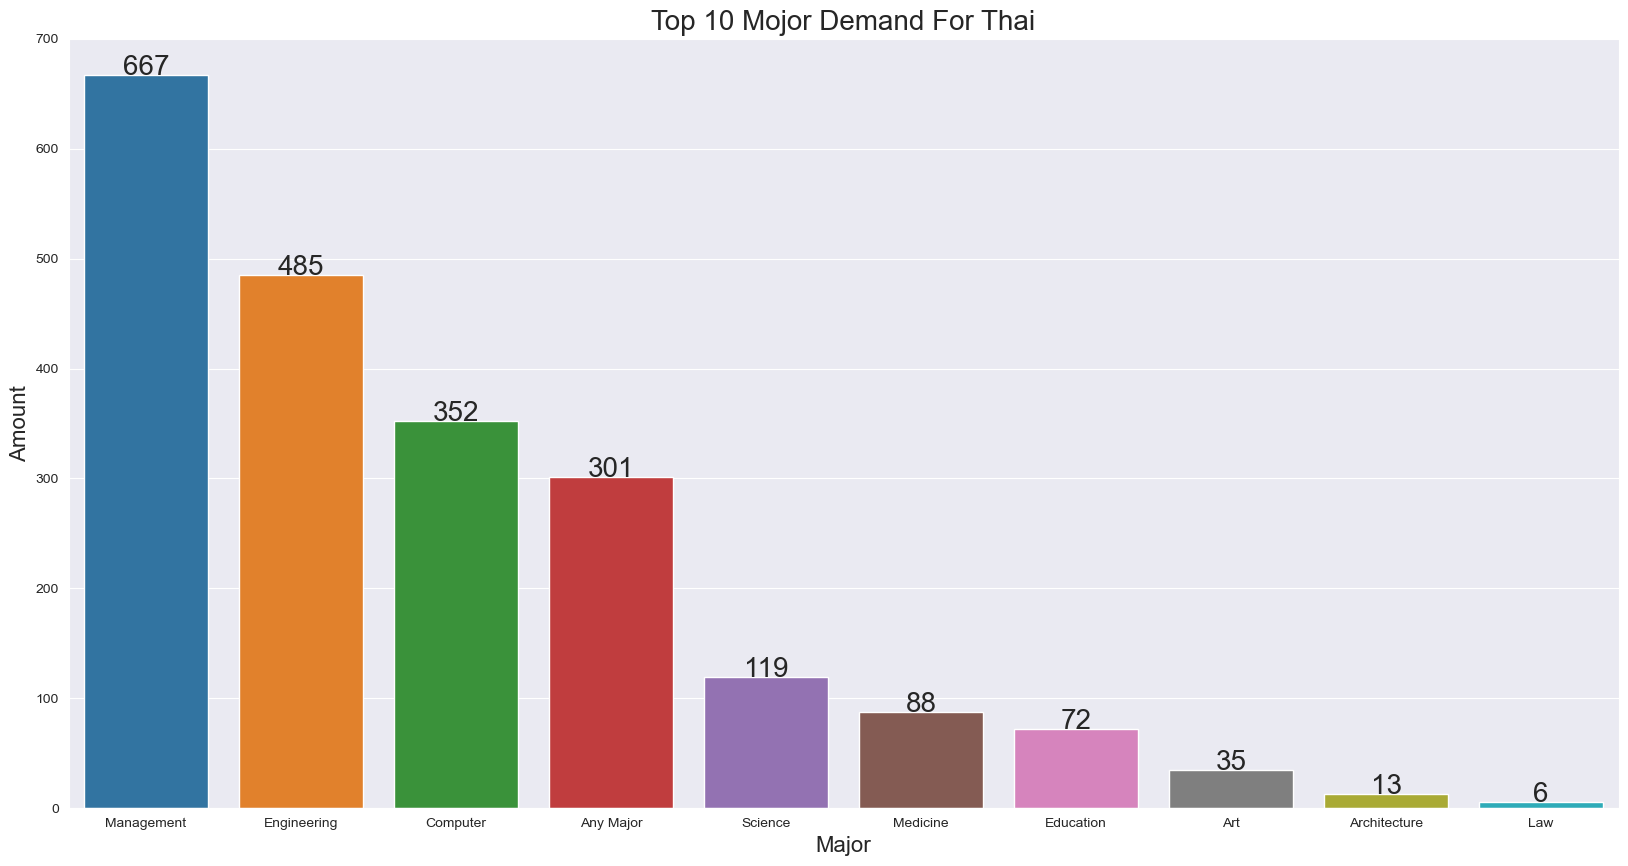

In [11]:
new_data_all_10 = new_data_all.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='Major', y='Thai', data=new_data_all_10)
for index, value in enumerate(new_data_all_10['Thai']):
    plt.text(index, value, str(value), fontsize=20, ha='center')

plt.title("Top 10 Mojor Demand For Thai", fontsize=20)
plt.xlabel("Major", fontsize=16)
plt.ylabel("Amount", fontsize=16)

plt.grid(visible=True, axis='y')

plt.show()

# Bar Chart 2
การเปรียบเทียบระหว่างผู้ชายและผู้หญิงในแต่ละสาขาวิชา

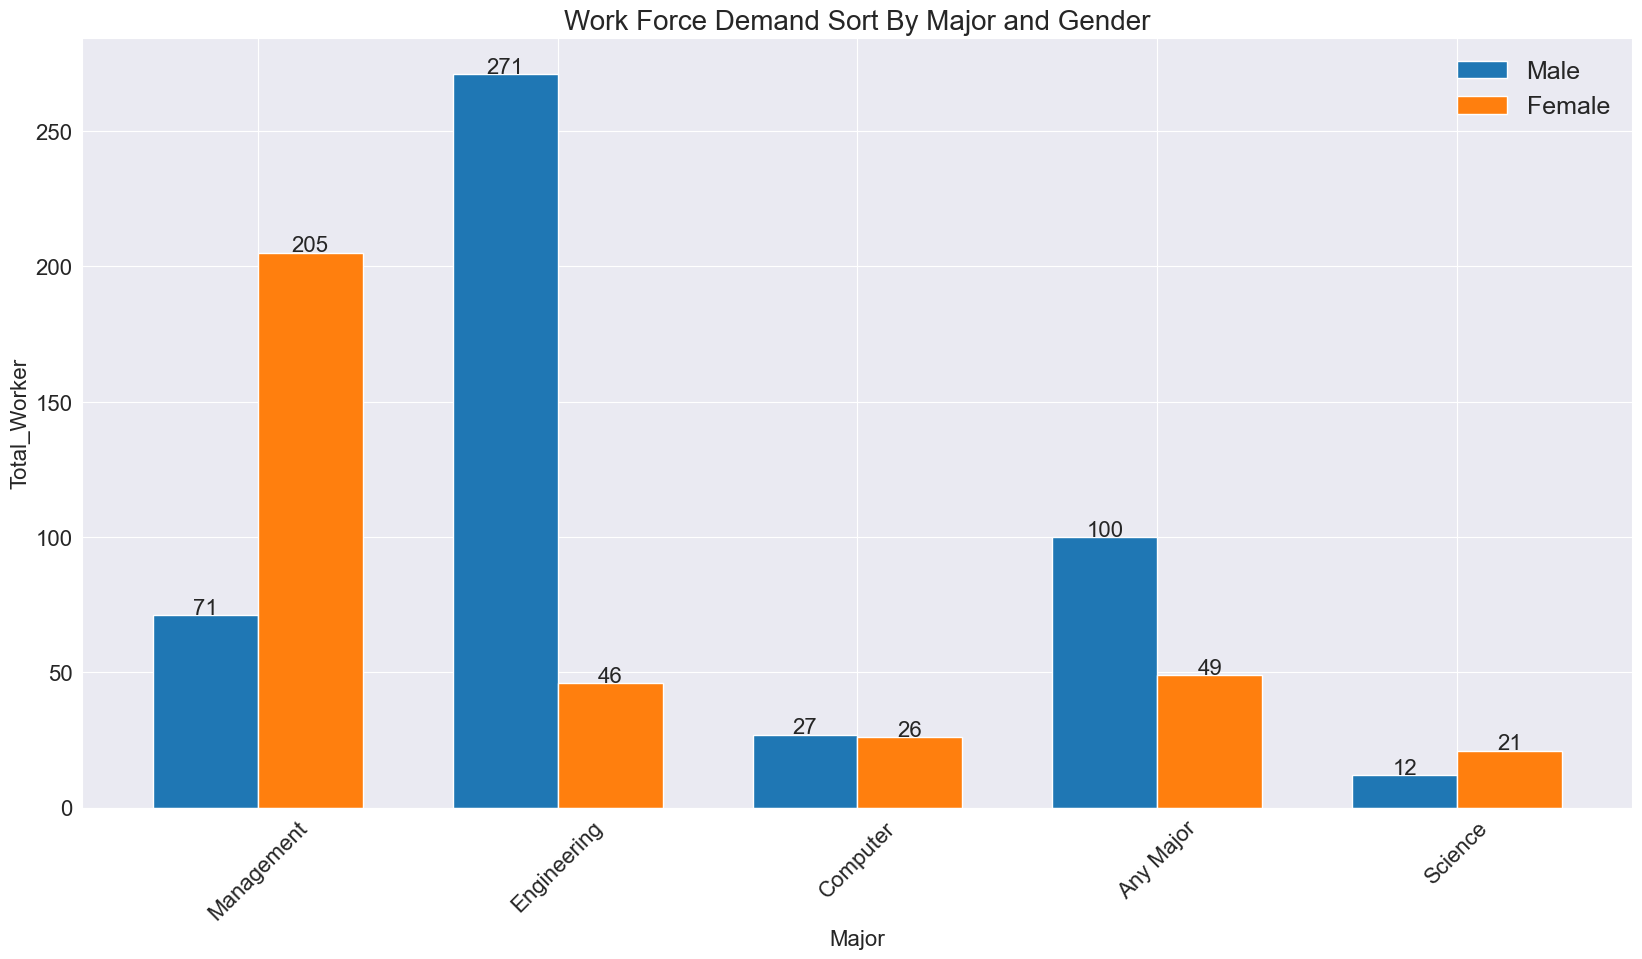

In [12]:
new_data_all = new_data_all.sort_values(by='Total_Work_Demand', ascending=False)
new_data_all = new_data_all.head(5)

index = np.arange(len(new_data_all.index))
bar_width = 0.35


fig, ax = plt.subplots(figsize = (20,10))
male = ax.bar(index, new_data_all["Male"], bar_width, label="Male")
female = ax.bar(index + bar_width, new_data_all["Female"], bar_width, label="Female")

for i, v in enumerate(male):
    ax.text(i, v.get_height()+0.5, str(v.get_height()), fontsize = 16, ha='center')
for i, v in enumerate(female):
    ax.text(i  + bar_width, v.get_height()+0.5, str(v.get_height()), fontsize = 16, ha='center')

plt.title("Work Force Demand Sort By Major and Gender", fontsize=20)
plt.xticks(index + bar_width/2, new_data_all.Major, fontsize=16, rotation=45)
plt.xlabel("Major", fontsize=16)
plt.ylabel("Total_Worker", fontsize=16)
plt.legend(loc='best', fontsize=18, frameon=False)

plt.yticks(fontsize=16)
plt.show()


# Pie Chart
เปอร์เซนต์แรงงานไทยของสาขาวิชาในปี 2565 

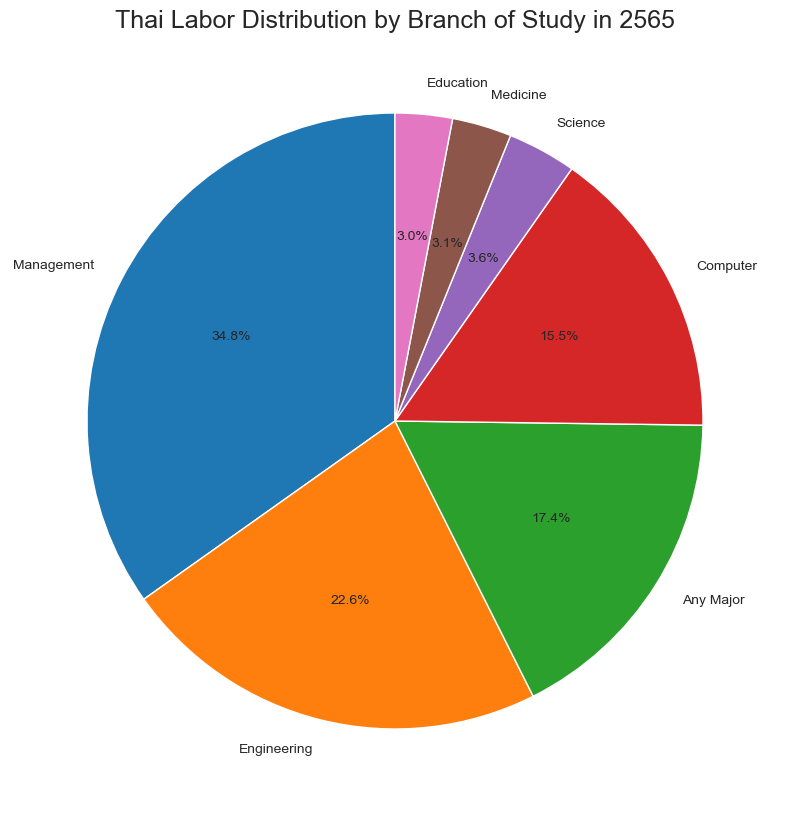

In [13]:
year = 2565
new_data_2565 = new_data_2565.sort_values(by='Thai', ascending=False)
new_data_2565 = new_data_2565.head(7)
labels = new_data_2565['Major']
sizes = new_data_2565['Thai']
plt.figure(figsize=(20, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Thai Labor Distribution by Branch of Study in {year}', fontsize = 18)
plt.show()
